In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, precision_recall_fscore_support, confusion_matrix, classification_report, plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Datasets

In [3]:
df = pd.read_csv('../../Data/cardio_data.csv')
df.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular_disease,BMI
0,50,2,168,62,110,80,1,1,0,0,1,0,21
1,55,1,156,85,140,90,3,1,0,0,1,1,34
2,51,1,165,64,130,70,3,1,0,0,0,1,23
3,48,2,169,82,150,100,1,1,0,0,1,1,28
4,47,1,156,56,100,60,1,1,0,0,0,0,23


## Pycaret Experimentation

In [4]:
import pycaret
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment

In [6]:
clf_exp = setup(data = df, target = 'cardiovascular_disease', session_id=123)

,Description,Value
0,Session id,123
1,Target,cardiovascular_disease
2,Target type,Binary
3,Original data shape,"(60144, 13)"
4,Transformed data shape,"(60144, 13)"
5,Transformed train set shape,"(42100, 13)"
6,Transformed test set shape,"(18044, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [7]:
best_model = compare_models(sort = 'precision')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7232,0.7884,0.6322,0.7606,0.6904,0.4440,0.4502,0.9230
ridge,Ridge Classifier,0.7206,0.0000,0.6400,0.7510,0.6911,0.4390,0.4437,0.0710
lda,Linear Discriminant Analysis,0.7206,0.7838,0.6400,0.7510,0.6911,0.4390,0.4437,0.2940
lightgbm,Light Gradient Boosting Machine,0.7274,0.7931,0.6688,0.7466,0.7055,0.4532,0.4556,0.5940
lr,Logistic Regression,0.7208,0.7827,0.6522,0.7443,0.6952,0.4397,0.4429,4.7310
gbc,Gradient Boosting Classifier,0.7267,0.7941,0.6728,0.7431,0.7062,0.4519,0.4538,1.9590
nb,Naive Bayes,0.7087,0.7680,0.6170,0.7428,0.6741,0.4147,0.4206,0.0780
xgboost,Extreme Gradient Boosting,0.7194,0.7832,0.6642,0.7355,0.6980,0.4372,0.4393,1.0200
qda,Quadratic Discriminant Analysis,0.7028,0.7646,0.6137,0.7341,0.6685,0.4031,0.4084,0.1250
rf,Random Forest Classifier,0.6996,0.7562,0.6813,0.6968,0.6889,0.3986,0.3988,2.7500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [8]:
# init the class
exp = ClassificationExperiment()
# init setup on exp
exp.setup(df, target = 'cardiovascular_disease', session_id = 123)

,Description,Value
0,Session id,123
1,Target,cardiovascular_disease
2,Target type,Binary
3,Original data shape,"(60144, 13)"
4,Transformed data shape,"(60144, 13)"
5,Transformed train set shape,"(42100, 13)"
6,Transformed test set shape,"(18044, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [9]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7274,0.7931,0.6688,0.7466,0.7055,0.4532,0.4556,0.7520
gbc,Gradient Boosting Classifier,0.7267,0.7941,0.6728,0.7431,0.7062,0.4519,0.4538,0.0900
ada,Ada Boost Classifier,0.7232,0.7884,0.6322,0.7606,0.6904,0.4440,0.4502,0.1160
lr,Logistic Regression,0.7208,0.7827,0.6522,0.7443,0.6952,0.4397,0.4429,1.4710
ridge,Ridge Classifier,0.7206,0.0000,0.6400,0.7510,0.6911,0.4390,0.4437,0.0500
lda,Linear Discriminant Analysis,0.7206,0.7838,0.6400,0.7510,0.6911,0.4390,0.4437,0.0520
xgboost,Extreme Gradient Boosting,0.7194,0.7832,0.6642,0.7355,0.6980,0.4372,0.4393,0.1830
nb,Naive Bayes,0.7087,0.7680,0.6170,0.7428,0.6741,0.4147,0.4206,0.0550
qda,Quadratic Discriminant Analysis,0.7028,0.7646,0.6137,0.7341,0.6685,0.4031,0.4084,0.0760
rf,Random Forest Classifier,0.6997,0.7562,0.6813,0.6969,0.6890,0.3987,0.3988,0.9840


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Using `Pycaret` we see that the top performing models are: `Gradient Boosting Classifier`, `Adaboost Classifier`, `Logistic Regression` and `Ridge Classifier`. We would be focusing our attention on the 4 models and see how they perform.

## Train | Validation | Test Split Procedure

In [14]:
X = df.drop('cardiovascular_disease', axis=1)
y = df['cardiovascular_disease']

# Split the data into training and testing sets. 80% of data is training data, set aside other 20% for test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Remaining 80% is split into valuation and test sets. 
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Scale the data using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Here, we are preparing data for use in a machine learning model that will predict whether someone has cardiovascular disease or not, based on various health-related features. Here is a breakdown of each step:

1. The first line `X = df.drop('cardio', axis=1)` selects all columns from the input dataframe except for the 'cardio' column. These are the features that the machine learning model will use to make its predictions. The second line `y = df['cardio']` selects only the 'cardio' column from the input dataframe. This is the column that contains the labels or outcomes we are trying to predict.

2. The third line uses the `train_test_split` function from the `sklearn library` to split the data into training and testing sets. We are using 80% of the data for training and 20% for testing. The `random_state` parameter is set to 42, which ensures that the data is split in the same way every time the code is run.

3. The fourth line further splits the training data into training and validation sets. We are using a `75/25` split (60% for training, 20% for validation) to tune our model's hyperparameters later.

4. The next three lines scale the data using standardization. Standardization scales the data to have a mean of 0 and a standard deviation of 1. This is useful for machine learning algorithms that assume the features are normally distributed. The `fit_transform` method fits the scaler on the training data and applies it to the training, validation, and testing data. We are overwriting the original `X_train` variable with the transformed data.

## ML Modelling

### LogisticRegression

In [15]:
# Instantiate the models
log_reg = LogisticRegression()
# Fit and evaluate the Logistic Regression model
log_reg.fit(X_train, y_train)
y_val_pred = log_reg.predict(X_val)
y_test_pred = log_reg.predict(X_test)
print("Logistic Regression")
print(f"Accuracy on validation set: {accuracy_score(y_val, y_val_pred)}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_test_pred)}")
print(f"Cross-validation score: {cross_val_score(log_reg, X_train_val, y_train_val, cv=5).mean()}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_test_pred)}\n")

Logistic Regression
Accuracy on validation set: 0.723834067669798
Accuracy on test set: 0.7225039487904231
Cross-validation score: 0.7197547542346462
Confusion matrix:
[[4872 1287]
 [2051 3819]]
Classification report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6159
           1       0.75      0.65      0.70      5870

    accuracy                           0.72     12029
   macro avg       0.73      0.72      0.72     12029
weighted avg       0.73      0.72      0.72     12029




* Accuracy on validation set: 0.723834067669798 -
This means that the logistic regression model correctly classified `72.38%` of the instances in the validation set.

* Accuracy on test set: 0.7225039487904231 -
This means that the logistic regression model correctly classified `72.22%` of the instances in the test set.

* Cross-validation score: 0.719775537774083 -
This is the average accuracy score of the logistic regression model during cross-validation, which is approximately `71.98%`.

* The classification report provides a summary of the model's performance on each class. The precision, recall, and F1-score metrics are calculated for both classes (0 and 1), as well as the macro and weighted averages across classes. In this case, the logistic regression model achieved a precision of `0.70` and recall of `0.79` for class 0, and a precision of `0.75` and recall of `0.65` for class 1. The overall accuracy on the test set was `0.72 = 72%`.

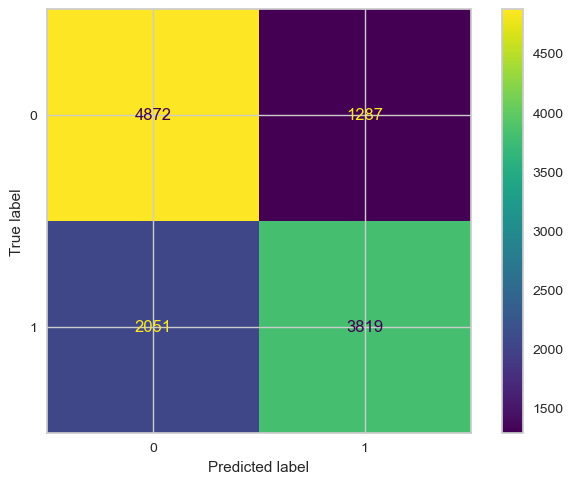

In [16]:
plot_confusion_matrix(log_reg, X_test, y_test);

* Confusion matrix: The confusion matrix shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) that the model predicted on the test set. In this case, the model correctly predicted `4872` true negatives and `3819` true positives, but incorrectly predicted `1287` false positives and `2051` false negatives.

### Adaboost Classifier

In [17]:
# Instantiate the models
ada = AdaBoostClassifier()
# Fit and evaluate the Adaboost Classifier model
ada.fit(X_train, y_train)
y_val_pred = ada.predict(X_val)
y_test_pred = ada.predict(X_test)
print("Adaboost Classifier")
print(f"Accuracy on validation set: {accuracy_score(y_val, y_val_pred)}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_test_pred)}")
print(f"Cross-validation score: {cross_val_score(ada, X_train_val, y_train_val, cv=5).mean()}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_test_pred)}\n")

Adaboost Classifier
Accuracy on validation set: 0.7258292459888602
Accuracy on test set: 0.7246653919694073
Cross-validation score: 0.722352696664242
Confusion matrix:
[[5016 1143]
 [2169 3701]]
Classification report:
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      6159
           1       0.76      0.63      0.69      5870

    accuracy                           0.72     12029
   macro avg       0.73      0.72      0.72     12029
weighted avg       0.73      0.72      0.72     12029




* Accuracy on validation set: 0.7258292459888602
This means that the Adaboost Classifier model correctly classified `72.58%` of the instances in the validation set.

* Accuracy on test set: 0.7246653919694073
This means that the Adaboost Classifier model correctly classified `72.46%` of the instances in the test set.

* Cross-validation score: 0.722352696664242
This is the average accuracy score of the Adaboost Classifier model during cross-validation, which is approximately `72.22%`.

* The classification report provides a summary of the model's performance on each class. The precision, recall, and F1-score metrics are calculated for both classes (0 and 1), as well as the macro and weighted averages across classes. In this case, the logistic regression model achieved a precision of `0.70` and recall of `0.81` for class 0, and a precision of `0.76` and recall of `0.63` for class 1. The overall accuracy on the test set was `0.72 = 72%`.

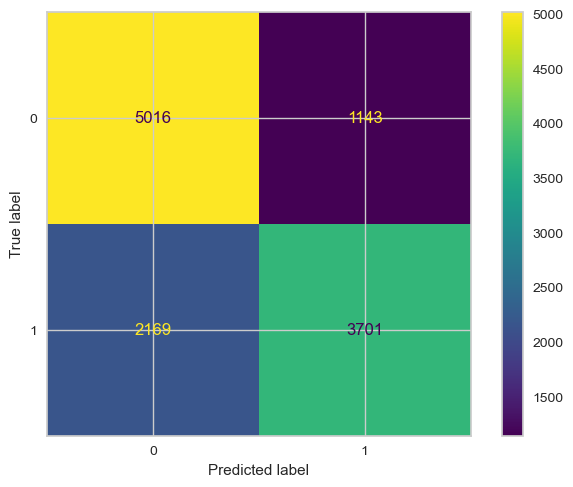

In [18]:
plot_confusion_matrix(ada, X_test, y_test);

* Confusion matrix: The confusion matrix shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) that the model predicted on the test set. In this case, the model correctly predicted `5016` true negatives and `3701` true positives, but incorrectly predicted `1143` false positives and `2169` false negatives.

### Gradientboost Classifier

In [19]:
# Instantiate the models
gb = GradientBoostingClassifier()
# Fit and evaluate the Gradientboost Classifier model
gb.fit(X_train, y_train)
y_val_pred = gb.predict(X_val)
y_test_pred = gb.predict(X_test)
print("Gradientboost Classifier")
print(f"Accuracy on validation set: {accuracy_score(y_val, y_val_pred)}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_test_pred)}")
print(f"Cross-validation score: {cross_val_score(gb, X_train_val, y_train_val, cv=5).mean()}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_test_pred)}\n")

Gradientboost Classifier
Accuracy on validation set: 0.7269099675783524
Accuracy on test set: 0.7294039404771802
Cross-validation score: 0.7279226852332953
Confusion matrix:
[[4746 1413]
 [1842 4028]]
Classification report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6159
           1       0.74      0.69      0.71      5870

    accuracy                           0.73     12029
   macro avg       0.73      0.73      0.73     12029
weighted avg       0.73      0.73      0.73     12029




* Accuracy on validation set: 0.7269099675783524
This means that the Gradientboost Classifier model correctly classified `72.69%` of the instances in the validation set.

* Accuracy on test set: 0.7294870729071411
This means that the Gradientboost Classifier model correctly classified `72.94%` of the instances in the test set.

* Cross-validation score: 0.7278811181544216
This is the average accuracy score of the Gradientboost Classifier model during cross-validation, which is approximately `72.79`.

* The classification report provides a summary of the model's performance on each class. The precision, recall, and F1-score metrics are calculated for both classes (0 and 1), as well as the macro and weighted averages across classes. In this case, the logistic regression model achieved a precision of `0.72` and recall of `0.77` for class 0, and a precision of `0.74` and recall of `0.69` for class 1. The overall accuracy on the test set was `0.73 = 73%`.

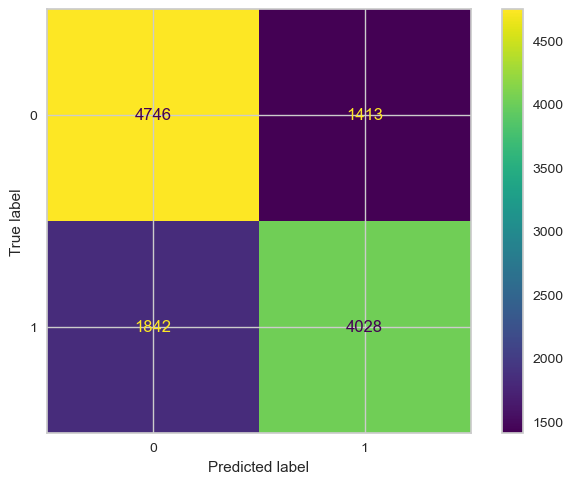

In [20]:
plot_confusion_matrix(gb, X_test, y_test);

* Confusion matrix: The confusion matrix shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) that the model predicted on the test set. In this case, the model correctly predicted `4746` true negatives and `4028` true positives, but incorrectly predicted `1413` false positives and `1842` false negatives.

### Ridge Classifier

In [21]:
# Instantiate the models
ridge_class = RidgeClassifier()
# Fit and evaluate the Ridge Classifier model
ridge_class.fit(X_train, y_train)
y_val_pred = ridge_class.predict(X_val)
y_test_pred = ridge_class.predict(X_test)
print("Ridge Classifier")
print(f"Accuracy on validation set: {accuracy_score(y_val, y_val_pred)}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_test_pred)}")
print(f"Cross-validation score: {cross_val_score(ridge_class, X_train_val, y_train_val, cv=5).mean()}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_test_pred)}\n")

Random Forest Classifier
Accuracy on validation set: 0.7230027433701887
Accuracy on test set: 0.7197605786017125
Cross-validation score: 0.7198171048529565
Confusion matrix:
[[4912 1247]
 [2124 3746]]
Classification report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.74      6159
           1       0.75      0.64      0.69      5870

    accuracy                           0.72     12029
   macro avg       0.72      0.72      0.72     12029
weighted avg       0.72      0.72      0.72     12029




* Accuracy on validation set:  0.7230027433701887
This means that the Random Forest Classifier model correctly classified `72.30%` of the instances in the validation set.

* Accuracy on test set: 0.7197605786017125
This means that the Random Forest Classifier model correctly classified `72%` of the instances in the test set.

* Cross-validation score: 0.7198171048529565
This is the average accuracy score of the Random Forest Classifier model during cross-validation, which is approximately `71.98%`.

* The classification report provides a summary of the model's performance on each class. The precision, recall, and F1-score metrics are calculated for both classes (0 and 1), as well as the macro and weighted averages across classes. In this case, the logistic regression model achieved a precision of `0.70` and recall of `0.80` for class 0, and a precision of `0.75` and recall of `0.64` for class 1. The overall accuracy on the test set was `0.72 = 72%`.

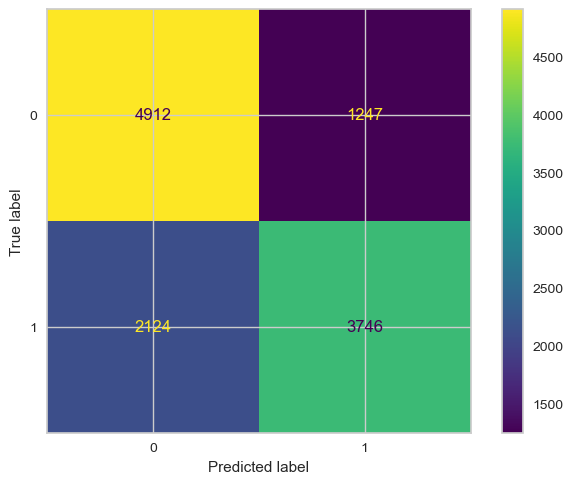

In [22]:
plot_confusion_matrix(ridge_class, X_test, y_test);

* Confusion matrix: The confusion matrix shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) that the model predicted on the test set. In this case, the model correctly predicted `4912` true negatives and `3746` true positives, but incorrectly predicted `2124` false positives and `1247` false negatives.

In [23]:
# Define the models
models = [
    ('Logistic Regression', log_reg),
    ('Adaboost Classifier', ada),
    ('Gradientboost Classifier', gb),
    ('Ridge Classifier', ridge_class)
]

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Evaluate each model and append the results to the DataFrame
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Evaluate the model on the validation set
    y_val_pred = model.predict(X_val)
    acc_val = accuracy_score(y_val, y_val_pred)
    p_val, r_val, f1_val, _ = precision_recall_fscore_support(y_val, y_val_pred, average='weighted')

    # Evaluate the model on the test set
    y_test_pred = model.predict(X_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    p_test, r_test, f1_test, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

    # Append the results to the DataFrame
    results_df = results_df.append({
        'Model': model_name,
        'Accuracy': f'Val: {acc_val:.3f}, Test: {acc_test:.3f}',
        'Precision': f'Val: {p_val:.3f}, Test: {p_test:.3f}',
        'Recall': f'Val: {r_val:.3f}, Test: {r_test:.3f}',
        'F1-Score': f'Val: {f1_val:.3f}, Test: {f1_test:.3f}'
    }, ignore_index=True)

# Print the results
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,"Val: 0.724, Test: 0.723","Val: 0.726, Test: 0.725","Val: 0.724, Test: 0.723","Val: 0.722, Test: 0.721"
1,Adaboost Classifier,"Val: 0.726, Test: 0.725","Val: 0.730, Test: 0.730","Val: 0.726, Test: 0.725","Val: 0.724, Test: 0.722"
2,Gradientboost Classifier,"Val: 0.727, Test: 0.729","Val: 0.727, Test: 0.730","Val: 0.727, Test: 0.729","Val: 0.726, Test: 0.729"
3,Ridge Classifier,"Val: 0.723, Test: 0.720","Val: 0.726, Test: 0.724","Val: 0.723, Test: 0.720","Val: 0.721, Test: 0.718"


### Hyperparameter Tuning

After checking the performance metrics of each of our model, `Adaboost Classifier` and `Gradientboost Classifier` showed promising results and had higher accuracy, cross-validation scores compared to the other models, therefore we selected them for hyperparameter tuning to further optimize their performance.

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define parameter distributions for RandomizedSearchCV
ada_param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.5),
    'algorithm': ['SAMME', 'SAMME.R']
}

gb_param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.5),
    'subsample': uniform(0.1, 0.9),
    'max_depth': randint(3, 10),
    'max_features': ['sqrt', 'log2', None]
}

In [14]:
# Create the Adaboost classifier and perform RandomizedSearchCV
ada = AdaBoostClassifier(random_state=42)
ada_random = RandomizedSearchCV(estimator=ada, param_distributions=ada_param_dist, n_iter=50,
                                cv=5, random_state=42, n_jobs=-1, verbose=2)
ada_random.fit(X_train, y_train)

# Print the best parameters and score for each classifier
print("Best parameters for Adaboost:", ada_random.best_params_)
print("Best score for Adaboost:", ada_random.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END algorithm=SAMME, learning_rate=0.40827149343011643, n_estimators=64; total time=   0.6s
[CV] END algorithm=SAMME, learning_rate=0.40827149343011643, n_estimators=64; total time=   0.6s
[CV] END algorithm=SAMME, learning_rate=0.40827149343011643, n_estimators=64; total time=   0.6s
[CV] END algorithm=SAMME, learning_rate=0.40827149343011643, n_estimators=64; total time=   0.6s
[CV] END algorithm=SAMME, learning_rate=0.40827149343011643, n_estimators=64; total time=   0.6s
[CV] END algorithm=SAMME, learning_rate=0.39984550013638465, n_estimators=70; total time=   0.6s
[CV] END algorithm=SAMME, learning_rate=0.39984550013638465, n_estimators=70; total time=   0.6s
[CV] END algorithm=SAMME, learning_rate=0.39984550013638465, n_estimators=70; total time=   0.6s
[CV] END algorithm=SAMME, learning_rate=0.39984550013638465, n_estimators=70; total time=   0.6s
[CV] END algorithm=SAMME, learning_rate=0.39984550013638465, n_es

In [15]:
# # Train Adaboost Classifier with the best hyperparameters
# ada_best = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.2575884550556351, n_estimators=224, random_state=42)
# ada_best.fit(X_train, y_train)

# # Evaluate the model on validation set
# y_pred = ada_best.predict(X_val)
# acc_val = accuracy_score(y_val, y_pred)

# # Evaluate the model on test set
# y_pred = ada_best.predict(X_test)
# acc_test = accuracy_score(y_test, y_pred)

# # Evaluate the model using cross-validation
# cv_scores = cross_val_score(ada_best, X_train_val, y_train_val, cv=5)

# # Print the performance metrics
# print("AdaBoost Classifier")
# print("Accuracy on validation set: {:.2f}%".format(acc_val*100))
# print("Accuracy on test set: {:.2f}%".format(acc_test*100))
# print("Cross-validation score: {:.2f}% (+/- {:.2f}%)".format(cv_scores.mean()*100, cv_scores.std()*2*100))
# print("Classification report:\n", classification_report(y_test, y_pred))

AdaBoost Classifier
Accuracy on validation set: 72.65%
Accuracy on test set: 72.62%
Cross-validation score: 72.27% (+/- 1.13%)
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.82      0.75      6159
           1       0.77      0.63      0.69      5870

    accuracy                           0.73     12029
   macro avg       0.73      0.72      0.72     12029
weighted avg       0.73      0.73      0.72     12029



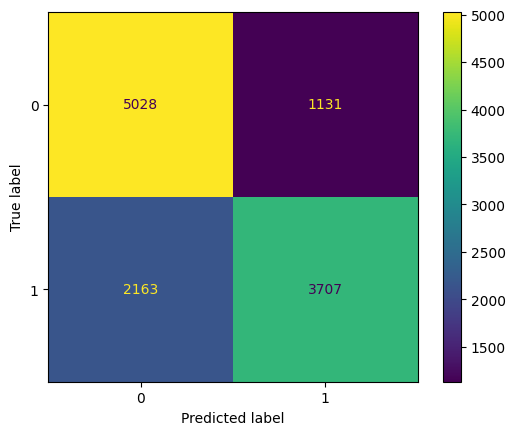

In [16]:
# plot_confusion_matrix(ada_best, X_test, y_test);

In [17]:
# Create the Gradientboost classifier and perform RandomizedSearchCV
gb = GradientBoostingClassifier(random_state=42)
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=gb_param_dist, n_iter=50,
                               cv=5, random_state=42, n_jobs=-1, verbose=2)
gb_random.fit(X_train, y_train)
print("Best parameters for GradientBoost:", gb_random.best_params_)
print("Best score for GradientBoost:", gb_random.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END learning_rate=0.19727005942368125, max_depth=7, max_features=None, n_estimators=156, subsample=0.8017219002454924; total time=   5.5s
[CV] END learning_rate=0.19727005942368125, max_depth=7, max_features=None, n_estimators=156, subsample=0.8017219002454924; total time=   5.6s
[CV] END learning_rate=0.19727005942368125, max_depth=7, max_features=None, n_estimators=156, subsample=0.8017219002454924; total time=   5.6s
[CV] END learning_rate=0.19727005942368125, max_depth=7, max_features=None, n_estimators=156, subsample=0.8017219002454924; total time=   5.5s
[CV] END learning_rate=0.19727005942368125, max_depth=7, max_features=None, n_estimators=156, subsample=0.8017219002454924; total time=   5.5s
[CV] END learning_rate=0.3084250789732435, max_depth=4, max_features=None, n_estimators=264, subsample=0.15227525095137953; total time=   2.2s
[CV] END learning_rate=0.3084250789732435, max_depth=4, max_features=None, n_est

In [17]:
# # Train GradientBoosting Classifier with the best hyperparameters
# gradboost_best = GradientBoostingClassifier(learning_rate= 0.02153121252070788, max_depth= 5, max_features= None, n_estimators= 219, subsample= 0.1419990968922539, random_state=42)
# gradboost_best.fit(X_train, y_train)

# # Evaluate the model on validation set
# y_pred = gradboost_best.predict(X_val)
# acc_val = accuracy_score(y_val, y_pred)

# # Evaluate the model on test set
# y_pred = gradboost_best.predict(X_test)
# acc_test = accuracy_score(y_test, y_pred)

# # Evaluate the model using cross-validation
# cv_scores = cross_val_score(gradboost_best, X_train_val, y_train_val, cv=5)

# # Print the performance metrics
# print("GradientBoost Classifier")
# print("Accuracy on validation set: {:.2f}%".format(acc_val*100))
# print("Accuracy on test set: {:.2f}%".format(acc_test*100))
# print("Cross-validation score: {:.2f}% (+/- {:.2f}%)".format(cv_scores.mean()*100, cv_scores.std()*2*100))
# print("Classification report:\n", classification_report(y_test, y_pred))

GradientBoost Classifier
Accuracy on validation set: 72.72%
Accuracy on test set: 73.01%
Cross-validation score: 72.79% (+/- 1.15%)
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      6159
           1       0.74      0.68      0.71      5870

    accuracy                           0.73     12029
   macro avg       0.73      0.73      0.73     12029
weighted avg       0.73      0.73      0.73     12029



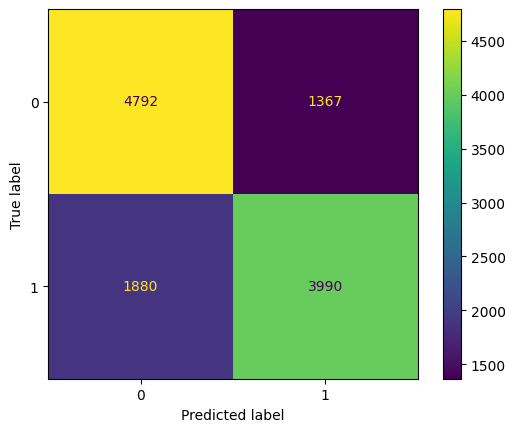

In [18]:
plot_confusion_matrix(gradboost_best, X_test, y_test);

In this code, we define parameter distributions for `AdaBoostClassifier` and `GradientBoostingClassifier` using the `randint` and `uniform` functions from the scipy.stats module. Then, we create the classifiers and perform RandomizedSearchCV using the `RandomizedSearchCV` function from scikit-learn. Finally, we print the best parameters and score for each classifier. You can adjust the parameter distributions and other settings as needed for your specific use case.

In [20]:
from sklearn.model_selection import GridSearchCV

# Define parameter distributions for GridSearchCV

# Adaboost Classifier
ada_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Gradientboost Classifier
gb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10]
}

In [21]:
ada_clf = AdaBoostClassifier(random_state=42)

ada_grid = GridSearchCV(ada_clf, param_grid=ada_params, cv=5, n_jobs=-1, scoring='accuracy')
ada_grid.fit(X_train, y_train)

print("Best Adaboost params:", ada_grid.best_params_)
print("Best Adaboost accuracy:", ada_grid.best_score_)

Best Adaboost params: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 100}
Best Adaboost accuracy: 0.7229949966123597


In [19]:
# # Train Adaboost Classifier with the best hyperparameters
# ada_grid_best = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1, n_estimators=100, random_state=42)
# ada_grid_best.fit(X_train, y_train)

# # Evaluate the model on validation set
# y_pred = ada_grid_best.predict(X_val)
# acc_val = accuracy_score(y_val, y_pred)

# # Evaluate the model on test set
# y_pred = ada_grid_best.predict(X_test)
# acc_test = accuracy_score(y_test, y_pred)

# # Evaluate the model using cross-validation
# cv_scores = cross_val_score(ada_grid_best, X_train_val, y_train_val, cv=5)

# # Print the performance metrics
# print("AdaBoost Classifier")
# print("Accuracy on validation set: {:.2f}%".format(acc_val*100))
# print("Accuracy on test set: {:.2f}%".format(acc_test*100))
# print("Cross-validation score: {:.2f}% (+/- {:.2f}%)".format(cv_scores.mean()*100, cv_scores.std()*2*100))
# print("Classification report:\n", classification_report(y_test, y_pred))

AdaBoost Classifier
Accuracy on validation set: 72.57%
Accuracy on test set: 72.52%
Cross-validation score: 72.26% (+/- 1.22%)
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75      6159
           1       0.76      0.63      0.69      5870

    accuracy                           0.73     12029
   macro avg       0.73      0.72      0.72     12029
weighted avg       0.73      0.73      0.72     12029



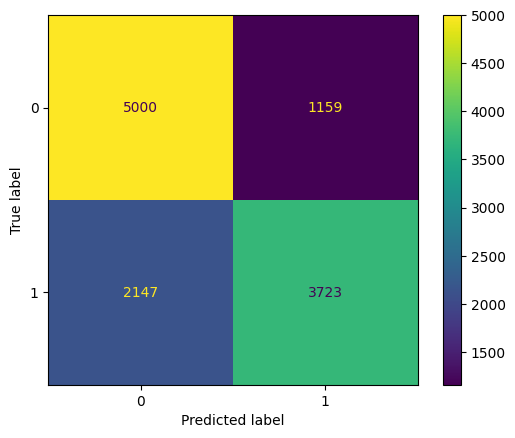

In [20]:
plot_confusion_matrix(ada_grid_best, X_test, y_test);

In [24]:
gb_clf = GradientBoostingClassifier(random_state=42)

gb_grid = GridSearchCV(gb_clf, param_grid=gb_params, cv=5, n_jobs=-1, scoring='accuracy')
gb_grid.fit(X_train, y_train)

print("Best GradientBoosting params:", gb_grid.best_params_)
print("Best GradientBoosting accuracy:", gb_grid.best_score_)

Best GradientBoosting params: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 150}
Best GradientBoosting accuracy: 0.7288975919015757


In [21]:
# # Train GradientBoosting Classifier with the best hyperparameters
# gradboost_grid_best = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, max_features= 'sqrt', min_samples_split = 10, n_estimators=150, random_state=42)
# gradboost_grid_best.fit(X_train, y_train)

# # Evaluate the model on validation set
# y_pred = gradboost_grid_best.predict(X_val)
# acc_val = accuracy_score(y_val, y_pred)

# # Evaluate the model on test set
# y_pred = gradboost_grid_best.predict(X_test)
# acc_test = accuracy_score(y_test, y_pred)

# # Evaluate the model using cross-validation
# cv_scores = cross_val_score(gradboost_grid_best, X_train_val, y_train_val, cv=5)

# # Print the performance metrics
# print("GradientBoosting Classifier ")
# print("Accuracy on validation set: {:.2f}%".format(acc_val*100))
# print("Accuracy on test set: {:.2f}%".format(acc_test*100))
# print("Cross-validation score: {:.2f}% (+/- {:.2f}%)".format(cv_scores.mean()*100, cv_scores.std()*2*100))
# print("Classification report:\n", classification_report(y_test, y_pred))

GradientBoosting Classifier 
Accuracy on validation set: 72.41%
Accuracy on test set: 72.89%
Cross-validation score: 72.79% (+/- 1.05%)
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      6159
           1       0.75      0.67      0.71      5870

    accuracy                           0.73     12029
   macro avg       0.73      0.73      0.73     12029
weighted avg       0.73      0.73      0.73     12029



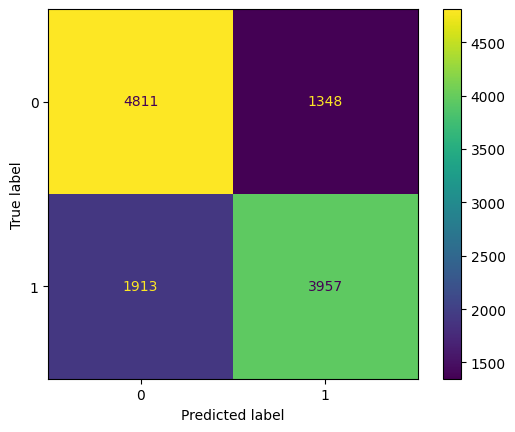

In [22]:
# plot_confusion_matrix(gradboost_grid_best, X_test, y_test);

This code defines a range of hyperparameters for both `Adaboost` and `GradientBoosting` classifiers and performs a grid search with cross-validation to find the best set of hyperparameters that maximize accuracy. The `GridSearchCV` object is defined with `cv=5` to use 5-fold cross-validation and `n_jobs=-1` to use all available CPU cores for parallel processing. The scoring parameter is set to `'accuracy'` to optimize for accuracy.

After running the code, the best set of hyperparameters and the corresponding `accuracy` score are printed for each model.

## Implementing Voting-Classifier

In [24]:
# from sklearn.ensemble import VotingClassifier

# vc = VotingClassifier(estimators=[('AdaBoost Classifier Best', ada_best),
#                                 ('GradientBoost Classifier Best', gradboost_best)], 
#                                 voting='hard')
# vc.fit(X_train,y_train)

# # Evaluate the model on validation set
# y_val_pred = vc.predict(X_val)
# acc_val = accuracy_score(y_val, y_val_pred)
# p_val, r_val, f1_val, _ = precision_recall_fscore_support(y_val, y_val_pred, average='weighted')

# # Evaluate the model on test set
# y_test_pred = vc.predict(X_test)
# acc_test = accuracy_score(y_test, y_test_pred)
# p_test, r_test, f1_test, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

# # Evaluate the model using cross-validation
# cv_scores = cross_val_score(vc, X_train_val, y_train_val, cv=5)

# # Append the results to the DataFrame
# results_df = results_df.append({
#     'Model': 'Voting Classifier',
#     'Accuracy': f'Val: {acc_val:.3f}, Test: {acc_test:.3f}',
#     'Precision': f'Val: {p_val:.3f}, Test: {p_test:.3f}',
#     'Recall': f'Val: {r_val:.3f}, Test: {r_test:.3f}',
#     'F1-Score': f'Val: {f1_val:.3f}, Test: {f1_test:.3f}'
# }, ignore_index=True)

# # Print the performance metrics
# print("Voting Classifier ")
# print("Accuracy on validation set: {:.2f}%".format(acc_val*100))
# print("Accuracy on test set: {:.2f}%".format(acc_test*100))
# print("Cross-validation score: {:.2f}% (+/- {:.2f}%)".format(cv_scores.mean()*100, cv_scores.std()*2*100))
# print("Classification report:\n", classification_report(y_test, y_pred))

Voting Classifier 
Accuracy on validation set: 72.57%
Accuracy on test set: 72.67%
Cross-validation score: 72.33% (+/- 1.08%)
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      6159
           1       0.75      0.67      0.71      5870

    accuracy                           0.73     12029
   macro avg       0.73      0.73      0.73     12029
weighted avg       0.73      0.73      0.73     12029



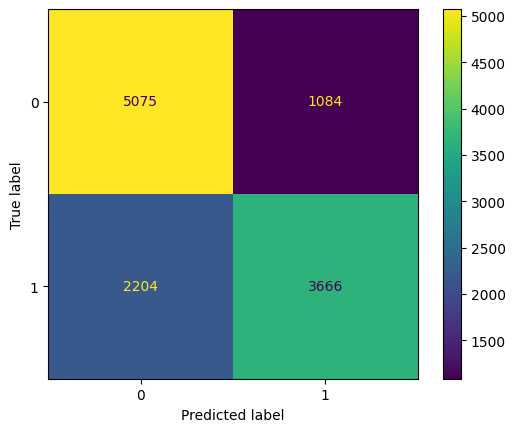

In [25]:
# plot_confusion_matrix(vc, X_test, y_test);

In [26]:
# sorted_results_df = results_df.sort_values('Precision', ascending=False)
# sorted_results_df

,Model,Accuracy,Precision,Recall,F1-Score
8,Voting Classifier,"Val: 0.726, Test: 0.727","Val: 0.731, Test: 0.734","Val: 0.726, Test: 0.727","Val: 0.723, Test: 0.724"
4,AdaBoost Classifier Best,"Val: 0.726, Test: 0.726","Val: 0.731, Test: 0.732","Val: 0.726, Test: 0.726","Val: 0.724, Test: 0.724"
1,Adaboost Classifier,"Val: 0.726, Test: 0.725","Val: 0.730, Test: 0.730","Val: 0.726, Test: 0.725","Val: 0.724, Test: 0.722"
6,AdaBoost Classifier GridSearch Best,"Val: 0.726, Test: 0.725","Val: 0.729, Test: 0.730","Val: 0.726, Test: 0.725","Val: 0.723, Test: 0.723"
5,GradientBoost Classifier Best,"Val: 0.727, Test: 0.730","Val: 0.728, Test: 0.731","Val: 0.727, Test: 0.730","Val: 0.726, Test: 0.729"
2,Gradientboost Classifier,"Val: 0.727, Test: 0.729","Val: 0.727, Test: 0.730","Val: 0.727, Test: 0.729","Val: 0.726, Test: 0.729"
0,Logistic Regression,"Val: 0.724, Test: 0.723","Val: 0.726, Test: 0.725","Val: 0.724, Test: 0.723","Val: 0.722, Test: 0.721"
7,GradientBoost Classifier GridSearch Best,"Val: 0.724, Test: 0.729","Val: 0.725, Test: 0.730","Val: 0.724, Test: 0.729","Val: 0.723, Test: 0.728"
3,Random Forest Classifier,"Val: 0.699, Test: 0.703","Val: 0.699, Test: 0.703","Val: 0.699, Test: 0.703","Val: 0.699, Test: 0.703"


## Appending all models

In [23]:
# # Define the models
# models = [
#     ('Logistic Regression', log_reg),
#     ('Adaboost Classifier', ada),
#     ('Gradientboost Classifier', gb),
#     ('Random Forest Classifier', rf),
#     ('AdaBoost Classifier Best', ada_best),
#     ('GradientBoost Classifier Best', gradboost_best),
#     ('AdaBoost Classifier GridSearch Best', ada_grid_best),
#     ('GradientBoost Classifier GridSearch Best', gradboost_grid_best)
# ]

# # Create an empty DataFrame to store the results
# results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# # Evaluate each model and append the results to the DataFrame
# for model_name, model in models:
#     # Train the model
#     model.fit(X_train, y_train)

#     # Evaluate the model on the validation set
#     y_val_pred = model.predict(X_val)
#     acc_val = accuracy_score(y_val, y_val_pred)
#     p_val, r_val, f1_val, _ = precision_recall_fscore_support(y_val, y_val_pred, average='weighted')

#     # Evaluate the model on the test set
#     y_test_pred = model.predict(X_test)
#     acc_test = accuracy_score(y_test, y_test_pred)
#     p_test, r_test, f1_test, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

#     # Append the results to the DataFrame
#     results_df = results_df.append({
#         'Model': model_name,
#         'Accuracy': f'Val: {acc_val:.3f}, Test: {acc_test:.3f}',
#         'Precision': f'Val: {p_val:.3f}, Test: {p_test:.3f}',
#         'Recall': f'Val: {r_val:.3f}, Test: {r_test:.3f}',
#         'F1-Score': f'Val: {f1_val:.3f}, Test: {f1_test:.3f}'
#     }, ignore_index=True)

# # Print the results
# print(results_df)

                                      Model                 Accuracy  \
0                       Logistic Regression  Val: 0.724, Test: 0.723   
1                       Adaboost Classifier  Val: 0.726, Test: 0.725   
2                  Gradientboost Classifier  Val: 0.727, Test: 0.729   
3                  Random Forest Classifier  Val: 0.699, Test: 0.703   
4                  AdaBoost Classifier Best  Val: 0.726, Test: 0.726   
5             GradientBoost Classifier Best  Val: 0.727, Test: 0.730   
6       AdaBoost Classifier GridSearch Best  Val: 0.726, Test: 0.725   
7  GradientBoost Classifier GridSearch Best  Val: 0.724, Test: 0.729   

                 Precision                   Recall                 F1-Score  
0  Val: 0.726, Test: 0.725  Val: 0.724, Test: 0.723  Val: 0.722, Test: 0.721  
1  Val: 0.730, Test: 0.730  Val: 0.726, Test: 0.725  Val: 0.724, Test: 0.722  
2  Val: 0.727, Test: 0.730  Val: 0.727, Test: 0.729  Val: 0.726, Test: 0.729  
3  Val: 0.699, Test: 0.703  Val: 0.

In [39]:
# sorted_results_df = results_df.sort_values('Precision', ascending=False)
# sorted_results_df

,Model,Accuracy,Precision,Recall,F1-Score
4,AdaBoost Classifier Best,"Val: 0.726, Test: 0.726","Val: 0.731, Test: 0.732","Val: 0.726, Test: 0.726","Val: 0.724, Test: 0.724"
1,Adaboost Classifier,"Val: 0.726, Test: 0.725","Val: 0.730, Test: 0.730","Val: 0.726, Test: 0.725","Val: 0.724, Test: 0.722"
6,AdaBoost Classifier GridSearch Best,"Val: 0.726, Test: 0.725","Val: 0.729, Test: 0.730","Val: 0.726, Test: 0.725","Val: 0.723, Test: 0.723"
5,GradientBoost Classifier Best,"Val: 0.727, Test: 0.730","Val: 0.728, Test: 0.731","Val: 0.727, Test: 0.730","Val: 0.726, Test: 0.729"
2,Gradientboost Classifier,"Val: 0.727, Test: 0.729","Val: 0.727, Test: 0.730","Val: 0.727, Test: 0.729","Val: 0.726, Test: 0.729"
0,Logistic Regression,"Val: 0.724, Test: 0.723","Val: 0.726, Test: 0.725","Val: 0.724, Test: 0.723","Val: 0.722, Test: 0.721"
7,GradientBoost Classifier GridSearch Best,"Val: 0.724, Test: 0.729","Val: 0.725, Test: 0.730","Val: 0.724, Test: 0.729","Val: 0.723, Test: 0.728"
3,Random Forest Classifier,"Val: 0.698, Test: 0.702","Val: 0.698, Test: 0.702","Val: 0.698, Test: 0.702","Val: 0.698, Test: 0.702"


In [41]:
# sorted_results_df = results_df.sort_values('Accuracy', ascending=False)
# sorted_results_df

,Model,Accuracy,Precision,Recall,F1-Score
5,GradientBoost Classifier Best,"Val: 0.727, Test: 0.730","Val: 0.728, Test: 0.731","Val: 0.727, Test: 0.730","Val: 0.726, Test: 0.729"
2,Gradientboost Classifier,"Val: 0.727, Test: 0.729","Val: 0.727, Test: 0.730","Val: 0.727, Test: 0.729","Val: 0.726, Test: 0.729"
4,AdaBoost Classifier Best,"Val: 0.726, Test: 0.726","Val: 0.731, Test: 0.732","Val: 0.726, Test: 0.726","Val: 0.724, Test: 0.724"
1,Adaboost Classifier,"Val: 0.726, Test: 0.725","Val: 0.730, Test: 0.730","Val: 0.726, Test: 0.725","Val: 0.724, Test: 0.722"
6,AdaBoost Classifier GridSearch Best,"Val: 0.726, Test: 0.725","Val: 0.729, Test: 0.730","Val: 0.726, Test: 0.725","Val: 0.723, Test: 0.723"
7,GradientBoost Classifier GridSearch Best,"Val: 0.724, Test: 0.729","Val: 0.725, Test: 0.730","Val: 0.724, Test: 0.729","Val: 0.723, Test: 0.728"
0,Logistic Regression,"Val: 0.724, Test: 0.723","Val: 0.726, Test: 0.725","Val: 0.724, Test: 0.723","Val: 0.722, Test: 0.721"
3,Random Forest Classifier,"Val: 0.698, Test: 0.702","Val: 0.698, Test: 0.702","Val: 0.698, Test: 0.702","Val: 0.698, Test: 0.702"


This created a DataFrame with columns for the model name, accuracy, precision, recall, and f1-score for both the validation and test sets. With `GradientBoost Classifier GridSearchCV` performing better across all performance metrics.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ce76747e-b0f1-459f-822a-5c7e53ff363d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>